In [1]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys

In [2]:
print(sys.version)

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


In [4]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
        
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing Jupyter notebook from %s" % path)
                                       
        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

importing Jupyter notebook from dl_pytorch_1.ipynb
tensor([[-0.6311,  0.2842],
        [-1.1941,  1.7584],
        [-0.6010, -2.3934],
        [ 1.7918, -0.6861],
        [-0.0637,  0.4481],
        [-1.4749, -0.2746],
        [-1.3117,  0.2155],
        [-0.6267,  0.0467],
        [-1.0023, -0.6264],
        [ 2.3196,  1.9544]]) tensor([ 1.9758, -4.1534, 11.1582, 10.1094,  2.5518,  2.1747,  0.8420,  2.7905,
         4.3459,  2.1921])
epoch 1, loss 0.030587
epoch 2, loss 0.000108
epoch 3, loss 0.000048
[2, -3.4] 
 tensor([[ 1.9997],
        [-3.4000]], requires_grad=True)
4.2 
 tensor([4.2002], requires_grad=True)
LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Parameter containing:
tensor([[0.6182, 0.2389]], requires_grad=True)
Parameter containing:
tensor([-0.2890], requires_grad=True)
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)
epoch 1, loss: 0.000279 ;
epoch 2, loss: 0.000039 ;
epoch 3, lo

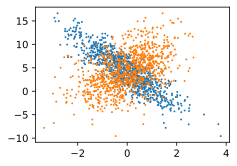

In [5]:
import dl_pytorch_1 as dl

In [7]:
batch_size = 256

importing Jupyter notebook from dl_softmax.ipynb
<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>


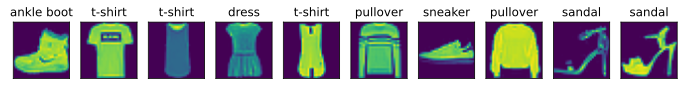

1.74 sec
tensor([[0.2343, 0.2076, 0.2265, 0.1477, 0.1839],
        [0.1870, 0.2404, 0.1394, 0.1937, 0.2395]]) tensor([1.0000, 1.0000])
Epoch 1, loss 0.7843, train accuracy 0.750, test accuracy 0.787
Epoch 2, loss 0.5717, train accuracy 0.812, test accuracy 0.810
Epoch 3, loss 0.5257, train accuracy 0.825, test accuracy 0.820
Epoch 4, loss 0.5018, train accuracy 0.831, test accuracy 0.826
Epoch 5, loss 0.4860, train accuracy 0.837, test accuracy 0.829


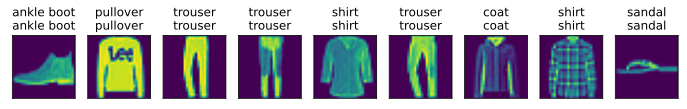

In [8]:
import dl_softmax as dl2

In [10]:
train_iter, test_iter = dl2.load_data_from_fmnist()

In [11]:
batch_size = 256

In [12]:
28*28

784

In [13]:
inputs_num = 28*28

In [14]:
outputs_num = 10

In [16]:
class LinearNet(nn.Module):
    def __init__(self,inputs_num,outputs_num):
        super(LinearNet,self).__init__()
        self.linear = nn.Linear(inputs_num,outputs_num)
        
    def forward(self,x):#x的shape为(batch_size,1,28,28)
        y=self.linear(x.view(x.shape[0],-1))
        return y

In [17]:
net = LinearNet(inputs_num,outputs_num)

In [19]:
#这也相当于一层？
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer,self).__init__()
    def forward(self,x):
        return x.view(x.shape[0],-1)


In [20]:
from collections import OrderedDict

net = nn.Sequential(OrderedDict([
    ('flatten',FlattenLayer()),
    ('linear',nn.Linear(inputs_num,outputs_num))
]))

In [21]:
init.normal(net.linear.weight,mean=0,std=0.01)
init.constant(net.linear.bias,val=0)

<ipython-input-21-4457beb11047>:1: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(net.linear.weight,mean=0,std=0.01)
<ipython-input-21-4457beb11047>:2: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(net.linear.bias,val=0)


Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [22]:
loss = nn.CrossEntropyLoss()

In [24]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.1)

In [25]:
epochs = 5

In [26]:
dl2.train_ch3(net,train_iter,test_iter,loss,epochs,batch_size,None,None,optimizer)

Epoch 1, loss 0.0031, train accuracy 0.749, test accuracy 0.784
Epoch 2, loss 0.0022, train accuracy 0.814, test accuracy 0.814
Epoch 3, loss 0.0021, train accuracy 0.826, test accuracy 0.816
Epoch 4, loss 0.0020, train accuracy 0.833, test accuracy 0.821
Epoch 5, loss 0.0019, train accuracy 0.837, test accuracy 0.826
